In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
_FILE_DIR = './app/data/'

In [25]:
raw_data = pd.read_excel(_FILE_DIR+'Hydrogen_projects_database_public_version.xlsx', sheet_name='Projects')

/Users/kgreeves/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning:

Data Validation extension is not supported and will be removed



In [26]:
col_names = raw_data.iloc[:3,:]
raw_data = raw_data.iloc[3:,:].reset_index(drop=True)
raw_data.columns = col_names.iloc[2,:].tolist()

In [27]:
def combine_headings(col_names:pd.DataFrame) -> list:
    new_list = []

    ## Update First row to fill in NaN
    for col in col_names.iloc[0,:]:
        if col is not np.nan:
            new_list.append(col)
        elif col is np.nan and len(new_list) > 0:
            new_list.append(new_list[-1])
        else:

            new_list.append(f'unknown-{len(new_list)}')

    ## If not NaN in second row, append to first row.
    for i, sub_col in enumerate(col_names.iloc[1,:]):
        if sub_col is not np.nan:
            new_list[i] += ': '+str(sub_col)

    return new_list

def generate_column_dictionary(keys:list, values:list)->dict:
    return {keys[i]: values[i] for i in range(len(keys))}

In [28]:
## Generate and store dictionary relating df col names and description.

column_dictionary = generate_column_dictionary(col_names.iloc[2,:].tolist(),
                           combine_headings(col_names))

with open('column_dictionary.dict', 'w') as file:
    file.write(json.dumps(column_dictionary))

In [55]:
num_col_list = [1,4,5,27,28,29,30,31]
bool_col_list = [12,13,14,15,16,17,18,19,20,21,22,23,24,25]
string_col_list = [2,3,6,7,8,9,10,11,26,32] # Additional work to convert Column26 to value and units. 

NUMERIC_COLS = ['Column'+str(i) for i in num_col_list]
BOOL_COLS = ['Column'+str(i) for i in bool_col_list]
STRING_COLS = ['Column'+str(i) for i in string_col_list]

In [87]:
for col in NUMERIC_COLS:
    raw_data[col] = pd.to_numeric(raw_data[col]) # int64 will be treated as floats as there are NaN values in all columns.
    
raw_data[BOOL_COLS] = raw_data[BOOL_COLS].fillna(0).astype(bool)

raw_data[['Column1','Column4','Column5']] = raw_data[['Column1','Column4','Column5']].fillna(9999).astype(int)

    

In [167]:
raw_data

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column26,Column27,Column28,Column29,Column30,Column31,Column32,sum,enduse_sum,enduse
0,0,Other projects from confidential sources (post...,NaN,9999,9999,Other/Unknown,NG w CCUS,NaN,NaN,NaN,...,3000kt H2/y,NaN,3.847930e+06,3000.000000,NaN,0.000000e+00,NaN,0,0,NaN
1,0,Other projects from confidential sources (post...,NaN,9999,9999,Other/Unknown,Other,Various types,NaN,NaN,...,165kt H2/y,NaN,2.116361e+05,165.000000,NaN,0.000000e+00,NaN,0,0,NaN
2,0,Other projects from confidential sources (post...,NaN,9999,9999,Other/Unknown,Other Electrolysis,Various types,NaN,NaN,...,14.3GW,14300.000000,3.177778e+06,2477.522667,NaN,3.177778e+06,NaN,0,0,NaN
3,0,Other projects from confidential sources (2000...,NaN,9999,9999,Operational,PEM,NaN,NaN,NaN,...,77MW,77.000000,1.480769e+04,11.544669,NaN,1.480769e+04,NaN,0,0,NaN
4,0,Other projects from confidential sources (2000...,NaN,9999,9999,Operational,ALK,NaN,NaN,NaN,...,20MW,20.000000,4.347826e+03,3.389739,NaN,4.347826e+03,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1929,"Sohar Port, phase 2",OMN,9999,9999,Concept,Other Electrolysis,Unknown PtX,Dedicated renewable,Unknown,...,350MW,315.000000,7.000000e+04,54.574800,NaN,7.000000e+04,[1548],1,1,Column15
1473,1930,"MoU Acme-Govt of Karnataka, phase 1",IND,2027,9999,Concept,Other Electrolysis,Unknown PtX,Dedicated renewable,Solar PV,...,0.1 Mt NH3/y,103.935679,2.309682e+04,18.007203,NaN,2.309682e+04,[1549],1,1,Column13
1474,1931,Energy Hub at MIRA Technology Park.,GBR,2022,9999,FID,Other Electrolysis,Membrane-free electrolyser,Other/Unknown,NaN,...,1.1MW,1.100000,2.444444e+02,0.190579,NaN,2.444444e+02,[1550],1,1,Column17
1475,1932,CF Industries - Mitsui Gulf Coast plant,USA,2027,9999,Feasibility study,NG w CCUS,Unknown Technology,NaN,NaN,...,1-1.4 Mt NH3/y,NaN,3.233554e+05,252.100840,NaN,0.000000e+00,[1551] [1552],1,1,Column13


In [88]:
raw_data.isna().sum(axis=0)

Column1        0
Column2        0
Column3       10
Column4        0
Column5        0
Column6        2
Column7        3
Column8      587
Column9      171
Column10     639
Column11      16
Column12       0
Column13       0
Column14       0
Column15       0
Column16       0
Column17       0
Column18       0
Column19       0
Column20       0
Column21       0
Column22       0
Column23       0
Column24       0
Column25       0
Column26     231
Column27     358
Column28     273
Column29     266
Column30    1413
Column31      96
Column32      98
dtype: int64

In [52]:
column_dictionary

{'Column1': 'Ref',
 'Column2': 'Project name',
 'Column3': 'Country',
 'Column4': 'Date online',
 'Column5': 'Decomission date',
 'Column6': 'Status',
 'Column7': 'Technology',
 'Column8': 'Technology: Technology Comments',
 'Column9': 'Technology: Type of electricity (for electrolysis projects)',
 'Column10': 'Technology: If dedicated renewables, type of renewable',
 'Column11': 'Product',
 'Column12': 'End use: Refining',
 'Column13': 'End use: Ammonia',
 'Column14': 'End use: Methanol',
 'Column15': 'End use: Iron&Steel',
 'Column16': 'End use: Other Ind',
 'Column17': 'End use: Mobility',
 'Column18': 'End use: Power',
 'Column19': 'End use: Grid inj.',
 'Column20': 'End use: CHP',
 'Column21': 'End use: Domestic heat',
 'Column22': 'End use: Biofuels',
 'Column23': 'End use: Synfuels',
 'Column24': 'End use: CH4 grid inj.',
 'Column25': 'End use: CH4 mobility',
 'Column26': 'Announced Size',
 'Column27': 'Normalised capacity: MWel',
 'Column28': 'Normalised capacity: nm³ H₂/h',
 '

In [145]:
def gen_enduse_col(x):
    print(x.columns)
    #if 
    #raw_data[BOOL_COLS].columns[x.argmax()], axis = 1
    

In [166]:
raw_data['enduse_sum'] = raw_data[BOOL_COLS].sum(axis=1)
raw_data['enduse'] = (raw_data[BOOL_COLS]
                      .idxmax(axis=1)
                      .where(raw_data['enduse_sum'] !=0)
                     )
#sns.scatterplot(data=raw_data, x='Column26', y='Column31')
raw_data['enduse']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1472    Column15
1473    Column13
1474    Column17
1475    Column13
1476    Column13
Name: enduse, Length: 1477, dtype: object

## Generate Static Figure from Dataset

In [93]:
dict(raw_data['Column7'].dropna().value_counts())

{'Other Electrolysis': 791,
 'PEM': 291,
 'ALK': 195,
 'NG w CCUS': 101,
 'SOEC': 38,
 'Biomass': 25,
 'Other': 15,
 'Oil w CCUS': 8,
 'Coal w CCUS': 8,
 'Biomass w CCUS': 2}

In [95]:
raw_data['Column7'].dropna().unique().tolist()

['NG w CCUS',
 'Other',
 'Other Electrolysis',
 'PEM',
 'ALK',
 'SOEC',
 'Biomass',
 'Oil w CCUS',
 'Coal w CCUS',
 'Biomass w CCUS']

In [47]:
status_by_endUse = (raw_data[['Column6','Column12','Column13','Column14',
                              'Column15','Column16','Column17','Column18',
                              'Column19','Column20','Column21','Column22',
                              'Column23','Column24','Column25','Column26',]]
                    .groupby(by='Column6')
                    .sum(numeric_only=True)
                    .T
                   )
status_by_endUse.index = status_by_endUse.index.map(lambda x:
                                                    column_dictionary[x].split(':')[1].strip())

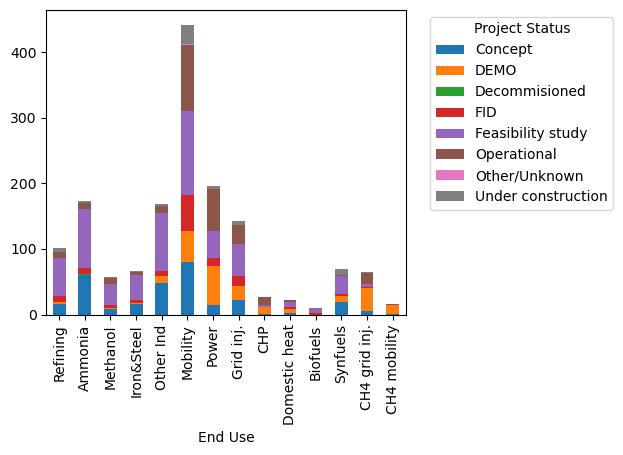

In [48]:
## Static Plot Showing the breakdown of ProjectStatus Based for each proposed End Use
ax = status_by_endUse.plot.bar(stacked=True)
plt.legend(title='Project Status', bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.suptitle('')
plt.xlabel('End Use')
plt.tight_layout()
plt.savefig('./app/img/project_status_by_end_use.png')

## Generate Dynamic Figure from Dataset

In [49]:
import plotly.express as px

In [96]:
status_by_endUse

Column6,Concept,DEMO,Decommisioned,FID,Feasibility study,Operational,Other/Unknown,Under construction
Refining,16.0,3.0,0.0,10.0,57.0,10.0,0.0,5.0
Ammonia,60.0,0.0,2.0,9.0,90.0,9.0,0.0,3.0
Methanol,8.0,2.0,0.0,4.0,32.0,10.0,0.0,2.0
Iron&Steel,16.0,2.0,0.0,5.0,37.0,5.0,0.0,2.0
Other Ind,48.0,11.0,0.0,8.0,88.0,11.0,0.0,3.0
Mobility,80.0,47.0,0.0,55.0,128.0,101.0,2.0,29.0
Power,15.0,59.0,0.0,12.0,42.0,63.0,0.0,5.0
Grid inj.,22.0,21.0,0.0,16.0,49.0,28.0,0.0,7.0
CHP,1.0,10.0,0.0,1.0,3.0,12.0,0.0,0.0
Domestic heat,3.0,5.0,0.0,4.0,7.0,3.0,0.0,0.0


In [50]:
hovertemplate_enduse = 'End Use: %{x}'+'<br>Count: %{y}'

fig = px.bar(status_by_endUse, labels= {'index':'End Use', 'value':'Project Count','Column6':column_dictionary['Column6']})
fig.write_html("./app/templates/static/html/test.html")
fig.update_traces(hovertemplate=hovertemplate_enduse)
fig.update_xaxes()
fig.show()

In [120]:
raw_data

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32
0,0,Other projects from confidential sources (post...,NaN,9999,9999,Other/Unknown,NG w CCUS,NaN,NaN,NaN,...,False,False,False,3000kt H2/y,NaN,3.847930e+06,3000.000000,NaN,0.000000e+00,NaN
1,0,Other projects from confidential sources (post...,NaN,9999,9999,Other/Unknown,Other,Various types,NaN,NaN,...,False,False,False,165kt H2/y,NaN,2.116361e+05,165.000000,NaN,0.000000e+00,NaN
2,0,Other projects from confidential sources (post...,NaN,9999,9999,Other/Unknown,Other Electrolysis,Various types,NaN,NaN,...,False,False,False,14.3GW,14300.000000,3.177778e+06,2477.522667,NaN,3.177778e+06,NaN
3,0,Other projects from confidential sources (2000...,NaN,9999,9999,Operational,PEM,NaN,NaN,NaN,...,False,False,False,77MW,77.000000,1.480769e+04,11.544669,NaN,1.480769e+04,NaN
4,0,Other projects from confidential sources (2000...,NaN,9999,9999,Operational,ALK,NaN,NaN,NaN,...,False,False,False,20MW,20.000000,4.347826e+03,3.389739,NaN,4.347826e+03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1929,"Sohar Port, phase 2",OMN,9999,9999,Concept,Other Electrolysis,Unknown PtX,Dedicated renewable,Unknown,...,False,False,False,350MW,315.000000,7.000000e+04,54.574800,NaN,7.000000e+04,[1548]
1473,1930,"MoU Acme-Govt of Karnataka, phase 1",IND,2027,9999,Concept,Other Electrolysis,Unknown PtX,Dedicated renewable,Solar PV,...,False,False,False,0.1 Mt NH3/y,103.935679,2.309682e+04,18.007203,NaN,2.309682e+04,[1549]
1474,1931,Energy Hub at MIRA Technology Park.,GBR,2022,9999,FID,Other Electrolysis,Membrane-free electrolyser,Other/Unknown,NaN,...,False,False,False,1.1MW,1.100000,2.444444e+02,0.190579,NaN,2.444444e+02,[1550]
1475,1932,CF Industries - Mitsui Gulf Coast plant,USA,2027,9999,Feasibility study,NG w CCUS,Unknown Technology,NaN,NaN,...,False,False,False,1-1.4 Mt NH3/y,NaN,3.233554e+05,252.100840,NaN,0.000000e+00,[1551] [1552]


In [126]:
raw_data[raw_data['Column3']=='ALB'].iloc[:,10:30]

,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30
636,H2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [129]:
references = pd.read_excel(_FILE_DIR+'Hydrogen_projects_database_public_version.xlsx', sheet_name='References', header=1)

In [130]:
references

,Number,Reference
0,1,Energieinstitut an der Johannes Kepler Univers...
1,2,European Power-to-Gas platform - Power-to-Gas ...
2,3,"Bailera et al., 2017. Power to Gas projects re..."
3,4,"F. Smeets and D. Thomas, 2017, HyBALANCE : sta..."
4,5,"G. Gahleitner, 2013. Hydrogen from renewable e..."
...,...,...
1578,1579,https://energynews.biz/elcogen-provides-electr...
1579,1580,https://www.equinor.com/news/archive/20211215-...
1580,1581,https://www.lhyfe.com/press/lhyfe-and-enerparc...
1581,1582,https://renewablesnow.com/news/rwe-to-study-gi...


In [78]:
from datetime import datetime
import pytz

tz = pytz.timezone('Europe/Berlin')
berlin_now = datetime.now(tz)

In [79]:
berlin_now

datetime.datetime(2023, 5, 18, 12, 42, 47, 734766, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [107]:
test_list = raw_data.columns.to_list()

In [ ]:
if col[-1]=='1'

In [112]:
[col for col in test_list if col[-1]=='1']

['Column1', 'Column11', 'Column21', 'Column31']